In [271]:
%run src/imports.py

In [272]:
sns.set(rc={'figure.figsize':(16,4)})

In [273]:
sale_data_df = pd.read_pickle('data/full.pkl')

In [274]:
sale_data_df.drop_duplicates(inplace=True)

In [275]:
sale_data_df.shape

(37456, 27)

In [276]:
sale_data_df[sale_data_df['DAYS ON MARKET'] < 60]['SOLD DATE'].count()

2442

## Feature Importance and Engineering
- Need to classify 1's and 0's based on whether it is sold in less than 60 days

In [277]:
correlations = sale_data_df.corr()

In [278]:
correlations

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,MLS#,LATITUDE,LONGITUDE
ZIP OR POSTAL CODE,1.000000,0.016566,0.032484,0.043919,0.043160,-0.000996,-0.015054,-0.071122,0.003894,0.006489,NaN,NaN,-0.011796,0.221963,-0.343160
PRICE,0.016566,1.000000,0.374789,0.615053,0.744923,0.002247,0.150613,-0.061811,0.018716,0.006182,NaN,NaN,0.012882,0.285154,-0.062260
BEDS,0.032484,0.374789,1.000000,0.615920,0.667653,-0.004451,0.346096,0.035393,-0.019045,-0.004740,NaN,NaN,-0.004124,0.212126,-0.093909
BATHS,0.043919,0.615053,0.615920,1.000000,0.792935,0.000461,0.396226,0.120737,0.001341,0.003795,NaN,NaN,0.001992,0.296834,-0.123047
SQUARE FEET,0.043160,0.744923,0.667653,0.792935,1.000000,0.000334,0.353814,0.044272,-0.012753,0.004341,NaN,NaN,0.008346,0.358461,-0.128944
LOT SIZE,-0.000996,0.002247,-0.004451,0.000461,0.000334,1.000000,0.008400,-0.007567,-0.000037,-0.000142,NaN,NaN,0.000040,-0.005064,0.000954
YEAR BUILT,-0.015054,0.150613,0.346096,0.396226,0.353814,0.008400,1.000000,0.065977,0.000784,-0.014724,NaN,NaN,-0.012198,0.181145,-0.111137
DAYS ON MARKET,-0.071122,-0.061811,0.035393,0.120737,0.044272,-0.007567,0.065977,1.000000,-0.007785,-0.003708,NaN,NaN,-0.022936,-0.000154,0.030716
$/SQUARE FEET,0.003894,0.018716,-0.019045,0.001341,-0.012753,-0.000037,0.000784,-0.007785,1.000000,0.002686,NaN,NaN,-0.000013,0.008063,0.002976
HOA/MONTH,0.006489,0.006182,-0.004740,0.003795,0.004341,-0.000142,-0.014724,-0.003708,0.002686,1.000000,NaN,NaN,0.000055,0.008028,-0.004638


In [279]:
highly_correlated = correlations[correlations > 0.5]

In [280]:
more_correlations = correlations[correlations < -0.5]

In [281]:
highly_correlated = highly_correlated[highly_correlated < 1]

In [282]:
highly_correlated.dropna(how='all',inplace=True)
more_correlations.dropna(how='all',inplace=True)

In [283]:
highly_correlated.dropna(axis=1,how='all',inplace=True)
more_correlations.dropna(axis=1,how='all',inplace=True)

In [284]:
highly_correlated

,PRICE,BEDS,BATHS,SQUARE FEET
PRICE,NaN,NaN,0.615053,0.744923
BEDS,NaN,NaN,0.615920,0.667653
BATHS,0.615053,0.615920,NaN,0.792935
SQUARE FEET,0.744923,0.667653,0.792935,NaN


In [285]:
sale_data_df['ROOMS'] = sale_data_df['BEDS'] + sale_data_df['BATHS']

In [286]:
sale_data_df['ROOMS PER SQFT * 1000'] = (sale_data_df['ROOMS'] / sale_data_df['SQUARE FEET'])*1000

In [287]:
sale_data_cleaned = sale_data_df.drop(['$/SQUARE FEET','BEDS','BATHS','ROOMS'],axis=1)

In [288]:
sale_data_cleaned.drop(['MLS#','SALE TYPE','STATUS','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','SOURCE','FAVORITE','INTERESTED'], axis=1,inplace=True)

In [289]:
cleaned_corr = sale_data_cleaned.corr()

In [290]:
cleaned_high_corr = cleaned_corr[cleaned_corr > 0.5][cleaned_corr < 1]

In [291]:
cleaned_high_corr.dropna(how='all',inplace=True)
cleaned_high_corr.dropna(axis=1,how='all',inplace=True)

In [292]:
cleaned_high_corr

,PRICE,SQUARE FEET
PRICE,NaN,0.744923
SQUARE FEET,0.744923,NaN


In [293]:
locations = sale_data_cleaned.LOCATION.unique()

In [294]:
counts = sale_data_cleaned.groupby('LOCATION').count()
neighborhoods = counts[counts['SOLD DATE'] > 50].index

In [295]:
neighborhoods_cleaned = sale_data_cleaned[sale_data_cleaned['LOCATION'].isin(neighborhoods)]

In [296]:
neighborhoods_cleaned.to_pickle('data/neighborhoods_cleaned.pkl')

In [220]:
medians = neighborhoods_cleaned.groupby('LOCATION').median().sort_values('$/SQUARE FEET',ascending=False)

In [241]:
medians.head(15)

,ZIP OR POSTAL CODE,PRICE,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,ROOMS PER SQFT * 1000
LOCATION,,,,,,,,,,
King William,78210.0,465000.0,6098.0,1920.0,291.0,274.0,NaN,29.409495,-98.490874,2.857143
Olmos Park,78212.0,680000.0,10454.0,1941.0,423.0,264.0,146.0,29.472027,-98.488906,2.373418
Alamo Heights,78209.0,594250.0,9147.0,1942.0,272.5,258.0,125.0,29.487446,-98.464635,2.484491
Lavaca,78210.0,395000.0,6534.0,1921.0,281.0,247.5,52.5,29.409701,-98.484311,3.219575
Mahncke Park,78209.0,382000.0,6098.0,1940.0,273.0,231.0,158.0,29.456535,-98.462684,3.269917
Terrell Hills,78209.0,600000.0,14374.0,1952.0,272.0,226.0,NaN,29.481481,-98.443078,2.295082
Tobin Hill,78212.0,325000.0,6098.0,1930.0,277.0,225.0,84.0,29.448533,-98.488144,3.257329
Terrell Heights,78209.0,304000.0,9147.0,1948.0,247.0,219.0,NaN,29.491703,-98.449656,2.994119
Monte Vista,78212.0,555000.0,9583.0,1926.0,286.0,217.0,3.0,29.458009,-98.493615,2.380008


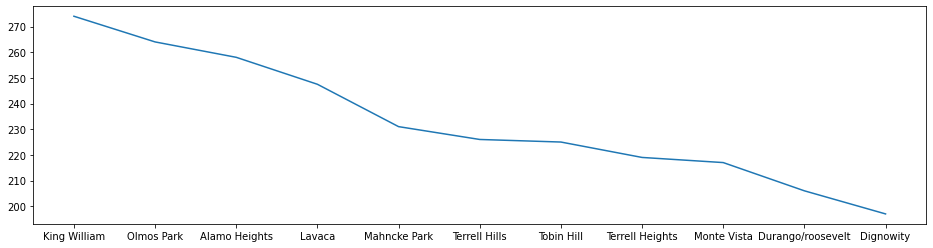

In [238]:
fig,ax = plt.subplots(figsize=(16,4))

ax = plt.plot(medians['$/SQUARE FEET'].head(11))

<AxesSubplot:xlabel='SOLD DATE', ylabel='Count'>

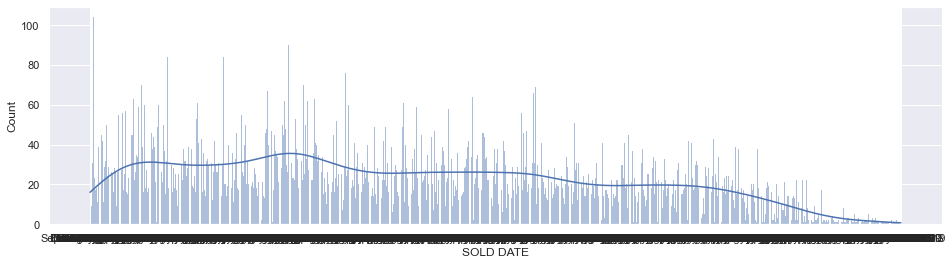

In [267]:
sns.histplot(data=neighborhoods_cleaned['SOLD DATE'],binwidth=30,kde=True,shrink=0.8)